# Quantum Volume Demo

Show some basic functionality of the quantum volume experiment.

In [1]:
from qiskit_experiments.framework import BatchExperiment
from qiskit_experiments.library import QuantumVolume
from qiskit import Aer
from qiskit.providers.aer import AerSimulator

# For simulation
from qiskit.test.mock import FakeSydney
backend = AerSimulator.from_backend(FakeSydney())

## Run QV experiment


Analysis Result: QuantumVolume
Analysis Result ID: 446cbb4b-e416-452d-bc2f-3bd043af119e
Experiment ID: 4486407c-e867-4284-82f7-c5b64dc40c4e
Device Components: [<Qubit(Q0)>, <Qubit(Q1)>, <Qubit(Q2)>, <Qubit(Q3)>]
Quality: None
Verified: False
Result Data:
- quantum volume: 1
- qv success: False
- confidence: 0.9579560390396762
- heavy output probability: [0.658203125, 0.783203125, 0.6611328125, 0.7802734375, 0.7958984375, 0.7744140625, 0.7177734375, 0.826171875, 0.74609375, 0.673828125, 0.7255859375, 0.705078125, 0.681640625, 0.70703125, 0.791015625, 0.716796875, 0.7314453125, 0.73828125, 0.7021484375, 0.7861328125, 0.689453125, 0.6396484375, 0.763671875, 0.7744140625, 0.7421875, 0.755859375, 0.802734375, 0.689453125, 0.7353515625, 0.6650390625, 0.7490234375, 0.7294921875, 0.7060546875, 0.73828125, 0.7158203125, 0.8203125, 0.69140625, 0.7431640625, 0.880859375, 0.7666015625, 0.779296875, 0.744140625, 0.8232421875, 0.740234375, 0.8447265625, 0.7783203125, 0.7138671875, 0.7333984375, 0.7

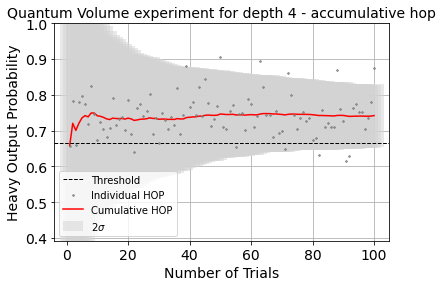

In [2]:
qubits = 4 # Can use specific qubits. for example [2, 4, 7]

qv_exp = QuantumVolume(qubits)
# Transpile options like optimization_level affect only the real device run and not the simulation run
# Run options affect both simulation and real device runs
qv_exp.set_transpile_options(optimization_level=3)
expdata = qv_exp.run(backend)
expdata.block_for_results()
# View result data
print(expdata.analysis_results(0))
display(expdata.figure(0))

### Adding trials

More trials will reduce the error bars to allow passing the threshold (beside the error bars - Quantum Volume experiment must have at least 100 trials to consider successful). <br>
In case you want to add less than 100 additional trials, you can modify the amount of trials added before re-running the experiment.


Analysis Result: QuantumVolume
Analysis Result ID: 446cbb4b-e416-452d-bc2f-3bd043af119e
Experiment ID: 4486407c-e867-4284-82f7-c5b64dc40c4e
Device Components: [<Qubit(Q0)>, <Qubit(Q1)>, <Qubit(Q2)>, <Qubit(Q3)>]
Quality: None
Verified: False
Result Data:
- quantum volume: 1
- qv success: False
- confidence: 0.9579560390396762
- heavy output probability: [0.658203125, 0.783203125, 0.6611328125, 0.7802734375, 0.7958984375, 0.7744140625, 0.7177734375, 0.826171875, 0.74609375, 0.673828125, 0.7255859375, 0.705078125, 0.681640625, 0.70703125, 0.791015625, 0.716796875, 0.7314453125, 0.73828125, 0.7021484375, 0.7861328125, 0.689453125, 0.6396484375, 0.763671875, 0.7744140625, 0.7421875, 0.755859375, 0.802734375, 0.689453125, 0.7353515625, 0.6650390625, 0.7490234375, 0.7294921875, 0.7060546875, 0.73828125, 0.7158203125, 0.8203125, 0.69140625, 0.7431640625, 0.880859375, 0.7666015625, 0.779296875, 0.744140625, 0.8232421875, 0.740234375, 0.8447265625, 0.7783203125, 0.7138671875, 0.7333984375, 0.7

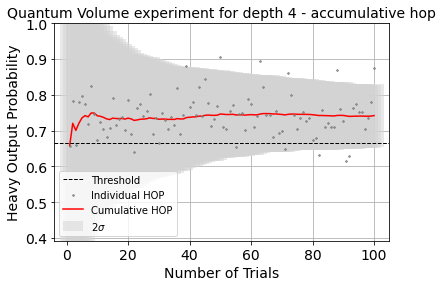

In [3]:
qv_exp.set_experiment_options(trials=60)
expdata2 = qv_exp.run(backend, experiment_data=expdata)
expdata2.block_for_results()
# View result data
print(expdata2.analysis_results(0))
display(expdata2.figure(0))

### Using another backed for simulation


Analysis Result: QuantumVolume
Analysis Result ID: a03edf7d-acc7-455e-8402-ba76b84e0b58
Experiment ID: 694fcdce-a4e5-4f3f-9d16-d90a7070cc20
Device Components: [<Qubit(Q0)>, <Qubit(Q1)>, <Qubit(Q2)>, <Qubit(Q3)>]
Quality: None
Verified: False
Result Data:
- quantum volume: 1
- qv success: False
- confidence: 0.8024339451216007
- heavy output probability: [0.759765625, 0.7001953125, 0.7587890625, 0.685546875, 0.693359375, 0.7333984375, 0.681640625, 0.7333984375, 0.720703125, 0.6435546875, 0.8203125, 0.71484375, 0.74609375, 0.623046875, 0.6796875, 0.677734375, 0.7275390625, 0.7548828125, 0.6513671875, 0.6953125, 0.7412109375, 0.67578125, 0.71875, 0.7041015625, 0.6630859375, 0.697265625, 0.728515625, 0.7021484375, 0.68359375, 0.7041015625, 0.705078125, 0.7119140625, 0.708984375, 0.6181640625, 0.6650390625, 0.7275390625, 0.6728515625, 0.7060546875, 0.7666015625, 0.66015625, 0.6953125, 0.6943359375, 0.74609375, 0.650390625, 0.7431640625, 0.6640625, 0.732421875, 0.728515625, 0.814453125, 0.7

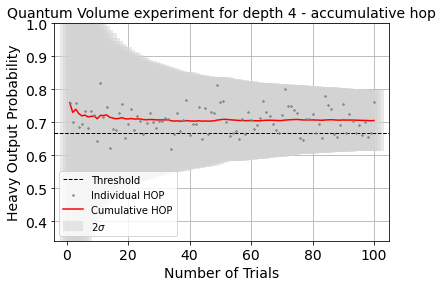

In [4]:
another_simulation_backend = Aer.get_backend('aer_simulator_matrix_product_state')
qv_exp2 = QuantumVolume(qubits, simulation_backend=another_simulation_backend)
expdata3 = qv_exp2.run(backend)
expdata3.block_for_results()
# View result data
print(expdata3.analysis_results(0))
display(expdata3.figure(0))

### Running Quantum Volume using a batch experiment

Run the experiment with an increasing number of qubits to check what is the maximum Quantum Volume for the specific device. To reach the real system's Quantum Volume, one must run more trials and additional enhancements might be required (readout error mitigation for example).

In [5]:
exps = [QuantumVolume(i) for i in range(3,7)]
for exp in exps:
    exp.set_experiment_options(trials=250)
batch_exp = BatchExperiment(exps)
batch_exp.set_transpile_options(optimization_level=3)
batch_expdata = batch_exp.run(backend)
expdata.block_for_results()

Extracting the maximum Quantum Volume.

In [7]:
qv = [batch_expdata.component_experiment_data(i).analysis_results(-1).data()['quantum volume'] 
      for i in range(batch_exp.num_experiments)]
print("Max quantum volume is: " + str(max(qv)))

Max quantum volume is: 32



Analysis Result: QuantumVolume
Analysis Result ID: 6e903b64-1791-441d-9dd4-7b17bc821703
Experiment ID: 5d6e7a62-df81-4734-bd55-127706a4df0c
Device Components: [<Qubit(Q0)>, <Qubit(Q1)>, <Qubit(Q2)>]
Quality: None
Verified: False
Result Data:
- quantum volume: 8
- qv success: True
- confidence: 0.9999999962826049
- heavy output probability: [0.9873046875, 0.986328125, 0.638671875, 0.8046875, 0.73046875, 0.8798828125, 0.7333984375, 0.859375, 0.7060546875, 0.740234375, 0.7744140625, 0.984375, 0.8310546875, 0.9853515625, 0.826171875, 0.6552734375, 0.7060546875, 0.7548828125, 0.865234375, 0.74609375, 0.890625, 0.8447265625, 0.701171875, 0.7958984375, 0.787109375, 0.84375, 0.8193359375, 0.796875, 0.8740234375, 0.9912109375, 0.8662109375, 0.8701171875, 0.798828125, 0.7021484375, 0.80859375, 0.7705078125, 0.8125, 0.794921875, 0.7685546875, 0.9921875, 0.8642578125, 0.6591796875, 0.9931640625, 0.828125, 0.8115234375, 0.7607421875, 0.7333984375, 0.6474609375, 0.802734375, 0.7333984375, 0.7304687

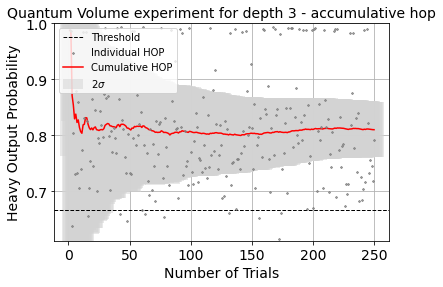


Analysis Result: QuantumVolume
Analysis Result ID: 8436ba9c-886f-4fd8-af7a-c5bb5616e465
Experiment ID: 5ef0b467-751c-4cb8-ba38-d4f5d97268f6
Device Components: [<Qubit(Q0)>, <Qubit(Q1)>, <Qubit(Q2)>, <Qubit(Q3)>]
Quality: None
Verified: False
Result Data:
- quantum volume: 16
- qv success: True
- confidence: 0.9963567184704434
- heavy output probability: [0.7021484375, 0.8330078125, 0.7080078125, 0.80859375, 0.6708984375, 0.7626953125, 0.6162109375, 0.7919921875, 0.826171875, 0.7001953125, 0.7626953125, 0.7255859375, 0.7158203125, 0.75390625, 0.7099609375, 0.740234375, 0.6962890625, 0.830078125, 0.7353515625, 0.7255859375, 0.6943359375, 0.6982421875, 0.7216796875, 0.732421875, 0.7275390625, 0.7841796875, 0.666015625, 0.79296875, 0.6962890625, 0.7666015625, 0.892578125, 0.7275390625, 0.740234375, 0.7724609375, 0.6982421875, 0.7412109375, 0.755859375, 0.6923828125, 0.73046875, 0.7060546875, 0.84375, 0.7958984375, 0.798828125, 0.671875, 0.7333984375, 0.7275390625, 0.7294921875, 0.75488281

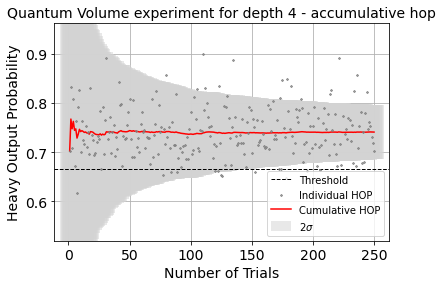


Analysis Result: QuantumVolume
Analysis Result ID: 6b518d4c-69d8-4065-b374-0f88dfcefb44
Experiment ID: aaebed0b-2a83-4ed1-80d3-939cf71f5462
Device Components: [<Qubit(Q0)>, <Qubit(Q1)>, <Qubit(Q2)>, <Qubit(Q3)>, <Qubit(Q4)>]
Quality: None
Verified: False
Result Data:
- quantum volume: 32
- qv success: True
- confidence: 0.9781013674453423
- heavy output probability: [0.7109375, 0.794921875, 0.669921875, 0.703125, 0.6572265625, 0.75, 0.736328125, 0.7275390625, 0.6962890625, 0.751953125, 0.6953125, 0.875, 0.7919921875, 0.783203125, 0.7587890625, 0.697265625, 0.73828125, 0.712890625, 0.7685546875, 0.8115234375, 0.6787109375, 0.7109375, 0.6884765625, 0.736328125, 0.7509765625, 0.7646484375, 0.6982421875, 0.71875, 0.7119140625, 0.7314453125, 0.7841796875, 0.712890625, 0.7607421875, 0.8203125, 0.708984375, 0.7265625, 0.6552734375, 0.6474609375, 0.8876953125, 0.7099609375, 0.8037109375, 0.74609375, 0.751953125, 0.6689453125, 0.7451171875, 0.716796875, 0.7119140625, 0.7734375, 0.759765625, 0.

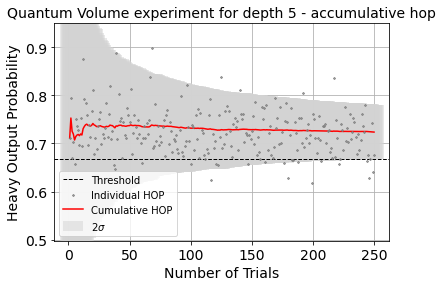


Analysis Result: QuantumVolume
Analysis Result ID: 214d4d40-b82a-4b56-86c5-eefd20c3767e
Experiment ID: e5311c20-b64e-460a-a9be-c62c742705b6
Device Components: [<Qubit(Q0)>, <Qubit(Q1)>, <Qubit(Q2)>, <Qubit(Q3)>, <Qubit(Q4)>, <Qubit(Q5)>]
Quality: None
Verified: False
Result Data:
- quantum volume: 1
- qv success: False
- confidence: 0.0207605473637944
- heavy output probability: [0.650390625, 0.6005859375, 0.6259765625, 0.630859375, 0.6259765625, 0.5771484375, 0.611328125, 0.611328125, 0.6171875, 0.5791015625, 0.5947265625, 0.58984375, 0.587890625, 0.5986328125, 0.599609375, 0.580078125, 0.572265625, 0.61328125, 0.5634765625, 0.5810546875, 0.580078125, 0.578125, 0.595703125, 0.625, 0.609375, 0.6357421875, 0.560546875, 0.5771484375, 0.6591796875, 0.6025390625, 0.591796875, 0.6201171875, 0.5546875, 0.6240234375, 0.62109375, 0.5791015625, 0.6025390625, 0.5869140625, 0.6025390625, 0.62890625, 0.63671875, 0.5693359375, 0.5791015625, 0.6044921875, 0.62109375, 0.5810546875, 0.58203125, 0.628

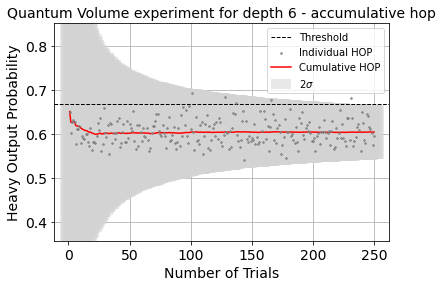

In [8]:
for i in range(batch_exp.num_experiments):
    print(batch_expdata.component_experiment_data(i).analysis_results(-1))
    display(batch_expdata.component_experiment_data(i).figure(0))